In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary

import pandas as pd
import numpy as np
import warnings

from tqdm.auto import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

warnings.filterwarnings(action='ignore')

In [2]:
epochs = 100
batch_size = 64
train_history = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = batch_size,
    shuffle = True,
    num_workers = 2
)

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
        
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [5]:
autoencoder = Autoencoder().to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)
criterion = nn.MSELoss()

In [6]:
summary(Autoencoder().to(device), input_size = (1, 28*28), device="CPU")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
              ReLU-2               [-1, 1, 128]               0
            Linear-3                [-1, 1, 64]           8,256
              ReLU-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 12]             780
              ReLU-6                [-1, 1, 12]               0
            Linear-7                 [-1, 1, 3]              39
            Linear-8                [-1, 1, 12]              48
              ReLU-9                [-1, 1, 12]               0
           Linear-10                [-1, 1, 64]             832
             ReLU-11                [-1, 1, 64]               0
           Linear-12               [-1, 1, 128]           8,320
             ReLU-13               [-1, 1, 128]               0
           Linear-14               [-1,

In [7]:
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255

In [8]:
def train(autoencoder, train_loader):
    autoencoder.train()
    train_loss = 0
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(device)
        y = x.view(-1, 28*28).to(device)
        label = label.to(device)
        
        encoded, decoded = autoencoder(x)
        
        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        
        train_loss += loss.item() # 기록
        optimizer.step()
        
    #
    train_loss /= (len(train_loader.dataset) / batch_size)
    train_history.append(train_loss) 
    print('Loss: {: .6f}'.format(train_loss))
    #

Loss:  0.037443
[Epoch 1]


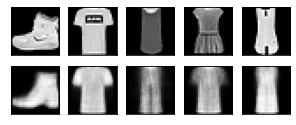

Loss:  0.025699
[Epoch 2]


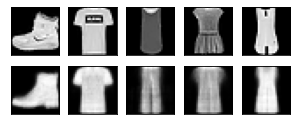

Loss:  0.024003
[Epoch 3]


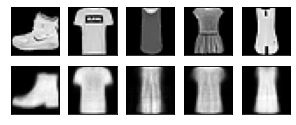

Loss:  0.023349
[Epoch 4]


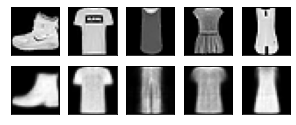

Loss:  0.022834
[Epoch 5]


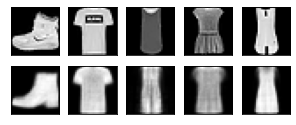

Loss:  0.022580
[Epoch 6]


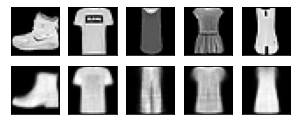

Loss:  0.022407
[Epoch 7]


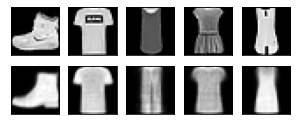

Loss:  0.022183
[Epoch 8]


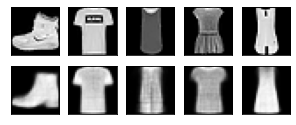

Loss:  0.022097
[Epoch 9]


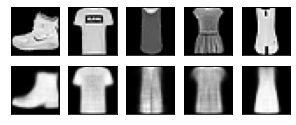

Loss:  0.021949
[Epoch 10]


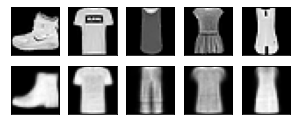

Loss:  0.022026
[Epoch 11]


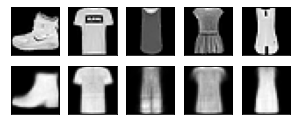

Loss:  0.021732
[Epoch 12]


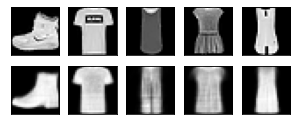

Loss:  0.021800
[Epoch 13]


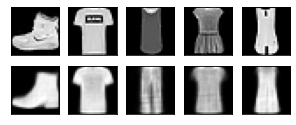

Loss:  0.021640
[Epoch 14]


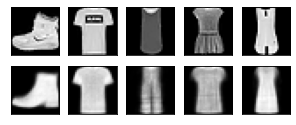

Loss:  0.021652
[Epoch 15]


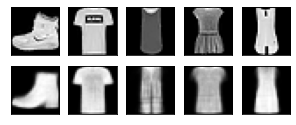

Loss:  0.021556
[Epoch 16]


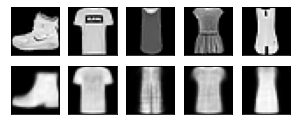

Loss:  0.021572
[Epoch 17]


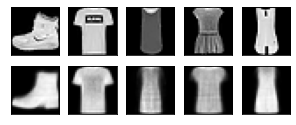

Loss:  0.021488
[Epoch 18]


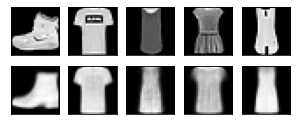

Loss:  0.021393
[Epoch 19]


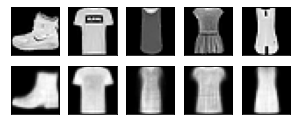

Loss:  0.021323
[Epoch 20]


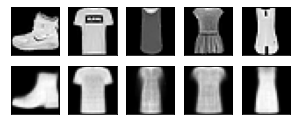

Loss:  0.021386
[Epoch 21]


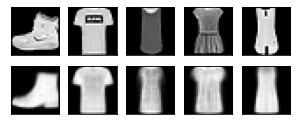

Loss:  0.021408
[Epoch 22]


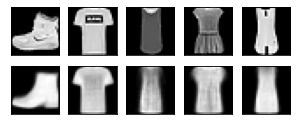

Loss:  0.021241
[Epoch 23]


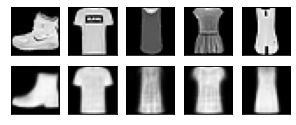

Loss:  0.021316
[Epoch 24]


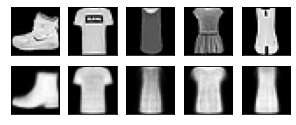

Loss:  0.021656
[Epoch 25]


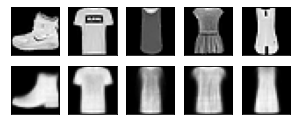

Loss:  0.021621
[Epoch 26]


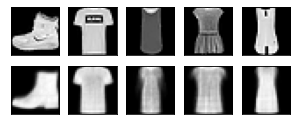

Loss:  0.021710
[Epoch 27]


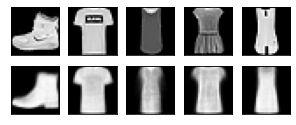

Loss:  0.021365
[Epoch 28]


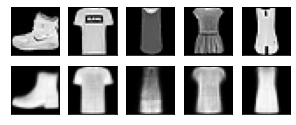

Loss:  0.021475
[Epoch 29]


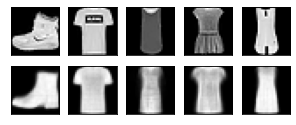

Loss:  0.021507
[Epoch 30]


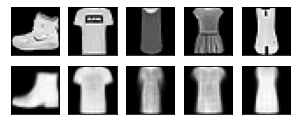

Loss:  0.021275
[Epoch 31]


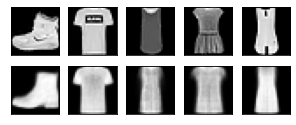

Loss:  0.021460
[Epoch 32]


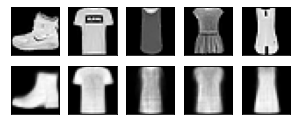

Loss:  0.021223
[Epoch 33]


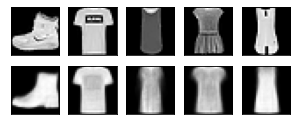

Loss:  0.021439
[Epoch 34]


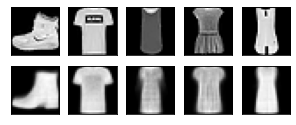

Loss:  0.021317
[Epoch 35]


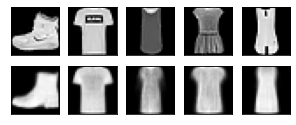

Loss:  0.021340
[Epoch 36]


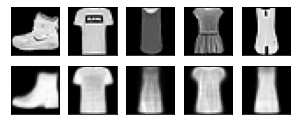

Loss:  0.021195
[Epoch 37]


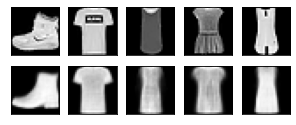

Loss:  0.021791
[Epoch 38]


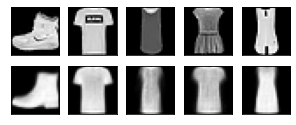

Loss:  0.021595
[Epoch 39]


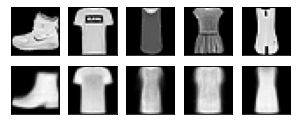

Loss:  0.021544
[Epoch 40]


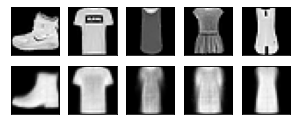

Loss:  0.021833
[Epoch 41]


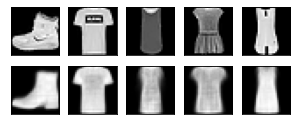

Loss:  0.021329
[Epoch 42]


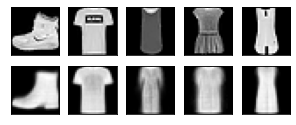

Loss:  0.022111
[Epoch 43]


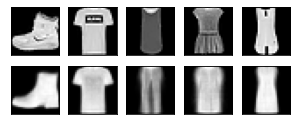

Loss:  0.021905
[Epoch 44]


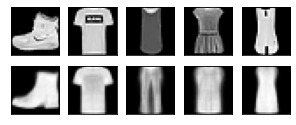

Loss:  0.021701
[Epoch 45]


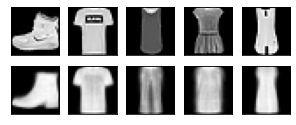

Loss:  0.021551
[Epoch 46]


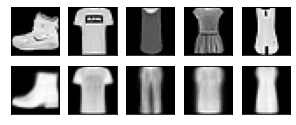

Loss:  0.021449
[Epoch 47]


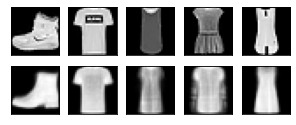

Loss:  0.021372
[Epoch 48]


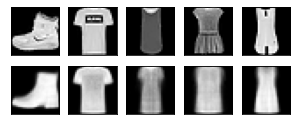

Loss:  0.021528
[Epoch 49]


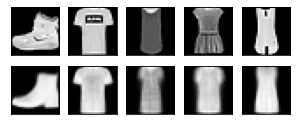

Loss:  0.021485
[Epoch 50]


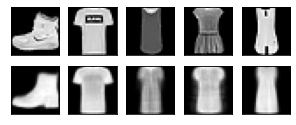

Loss:  0.021375
[Epoch 51]


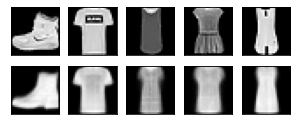

Loss:  0.021598
[Epoch 52]


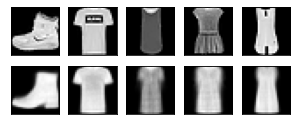

Loss:  0.021494
[Epoch 53]


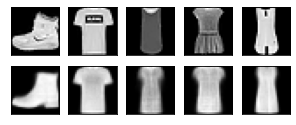

Loss:  0.021461
[Epoch 54]


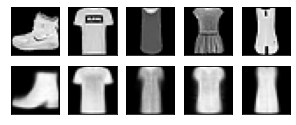

Loss:  0.021232
[Epoch 55]


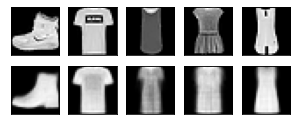

Loss:  0.021231
[Epoch 56]


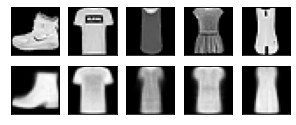

Loss:  0.021358
[Epoch 57]


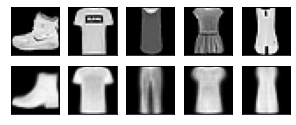

Loss:  0.021249
[Epoch 58]


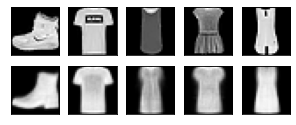

Loss:  0.021420
[Epoch 59]


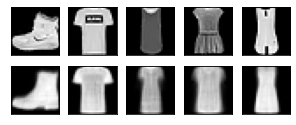

Loss:  0.021316
[Epoch 60]


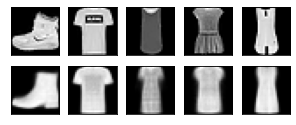

Loss:  0.021296
[Epoch 61]


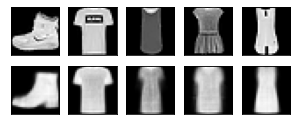

Loss:  0.021494
[Epoch 62]


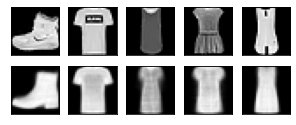

Loss:  0.021378
[Epoch 63]


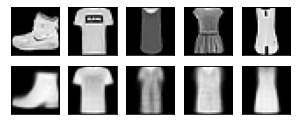

Loss:  0.021163
[Epoch 64]


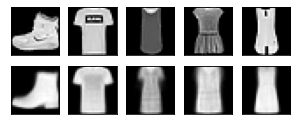

Loss:  0.021608
[Epoch 65]


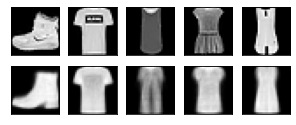

Loss:  0.021244
[Epoch 66]


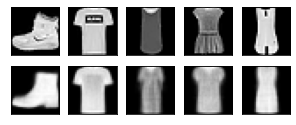

Loss:  0.021137
[Epoch 67]


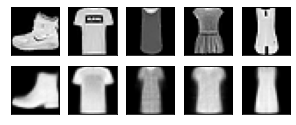

Loss:  0.021338
[Epoch 68]


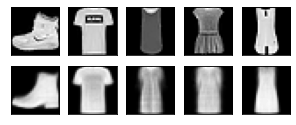

Loss:  0.021266
[Epoch 69]


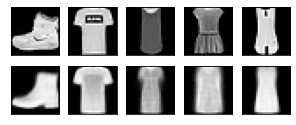

Loss:  0.021187
[Epoch 70]


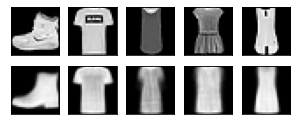

Loss:  0.021213
[Epoch 71]


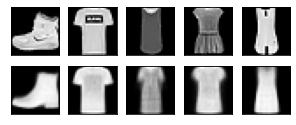

Loss:  0.021256
[Epoch 72]


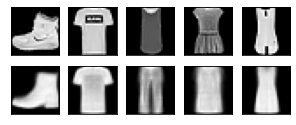

Loss:  0.021345
[Epoch 73]


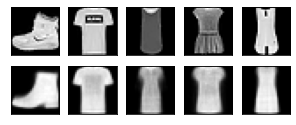

Loss:  0.021259
[Epoch 74]


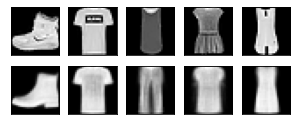

Loss:  0.021297
[Epoch 75]


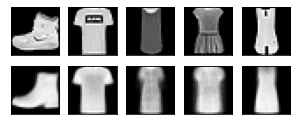

Loss:  0.021134
[Epoch 76]


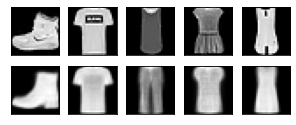

Loss:  0.022450
[Epoch 77]


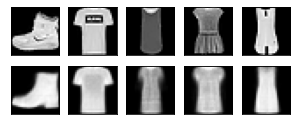

Loss:  0.021991
[Epoch 78]


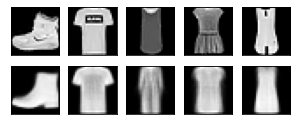

Loss:  0.021636
[Epoch 79]


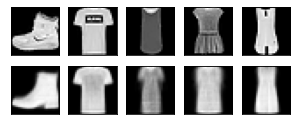

Loss:  0.021424
[Epoch 80]


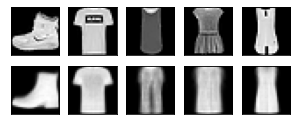

Loss:  0.021227
[Epoch 81]


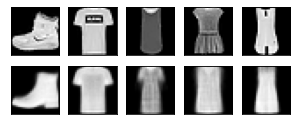

Loss:  0.021481
[Epoch 82]


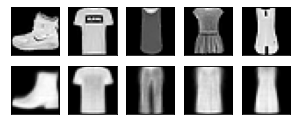

Loss:  0.021342
[Epoch 83]


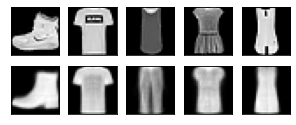

Loss:  0.021199
[Epoch 84]


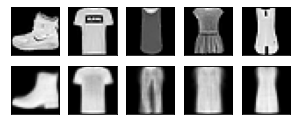

Loss:  0.021329
[Epoch 85]


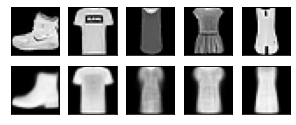

Loss:  0.021755
[Epoch 86]


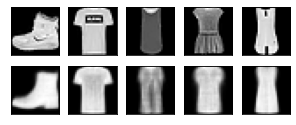

Loss:  0.021527
[Epoch 87]


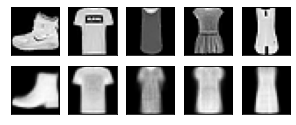

Loss:  0.021064
[Epoch 88]


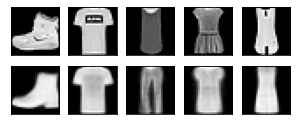

Loss:  0.021154
[Epoch 89]


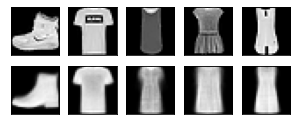

Loss:  0.021092
[Epoch 90]


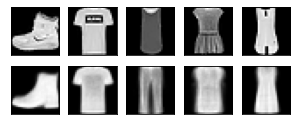

Loss:  0.021051
[Epoch 91]


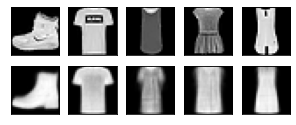

Loss:  0.021172
[Epoch 92]


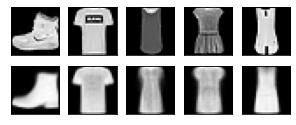

Loss:  0.021000
[Epoch 93]


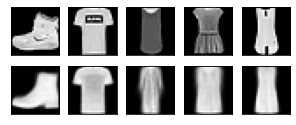

Loss:  0.021335
[Epoch 94]


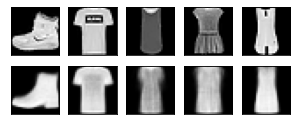

Loss:  0.021187
[Epoch 95]


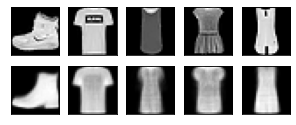

Loss:  0.021075
[Epoch 96]


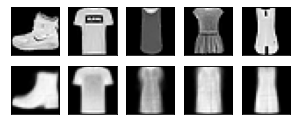

Loss:  0.021228
[Epoch 97]


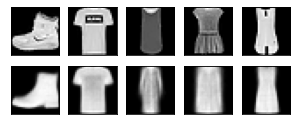

Loss:  0.021002
[Epoch 98]


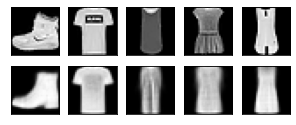

Loss:  0.020979
[Epoch 99]


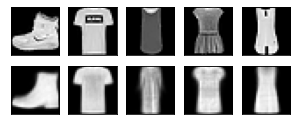

Loss:  0.021115
[Epoch 100]


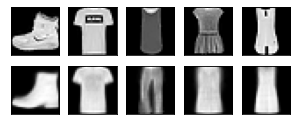

In [9]:
for epoch in range(1, epochs+1):
    train(autoencoder, train_loader)
    
    # 시각화
    test_x = view_data.to(device)
    _, decoded_data = autoencoder(test_x)
    
    # 원본과 디코딩 결과 비교
    f, a = plt.subplots(2, 5, figsize=(5,2))
    print("[Epoch {}]".format(epoch))
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28, 28))
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())
    
    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())
    
    plt.show()